In [2]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.preprocessing import LabelEncoder

In [3]:
ferti=pd.read_csv("FertilizerPrediction.csv",encoding ='latin1')
ferti.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
import random
lst=[]
for i in range(101):
    n=random.randint(2,11)
    lst.append(n)

In [4]:
df1=pd.DataFrame(lst,columns=['ph-value'])

In [5]:
new_df=ferti.join(df1)

In [6]:
df=new_df[['Moisture','ph-value','Nitrogen','Potassium','Phosphorous']]

In [7]:
df.to_csv("MoisturePHdataset.csv")

In [8]:
data=np.asarray(df)
x=data[:,0:2]
y=data[:,2:3]
y1=data[:,3:4]
y2=data[:,4:5]

In [9]:
x[0]

array([38,  5], dtype=int64)

In [10]:
y[0]

array([37], dtype=int64)

In [11]:
y1[0]

array([0], dtype=int64)

In [12]:
y2[1]

array([36], dtype=int64)

In [13]:
y=y.astype('int')
y1=y1.astype('int')
y2=y2.astype('int')

In [14]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)

In [15]:
ada.fit(x, y)
ada1.fit(x, y1)
ada2.fit(x, y2)

C:\Users\INBOTICS\.conda\envs\gpu38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\INBOTICS\.conda\envs\gpu38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\INBOTICS\.conda\envs\gpu38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   n_estimators=150)

In [16]:
import pickle
with open('model_nitrogen_moisture_ph_ada.sav','wb') as f:
    pickle.dump(ada,f)

In [17]:
import pickle
with open('model_Potassium_moisture_ph_ada.sav','wb') as f:
    pickle.dump(ada1,f)

In [18]:
import pickle
with open('model_Phosphorous_moisture_ph_ada.sav','wb') as f:
    pickle.dump(ada2,f)

In [19]:
import pandas as pd
dict = {'Moisture':float(input("Enter Moisture:")),
        'Ph value':float(input("Enter Ph-Value:"))}
dff=pd.DataFrame(dict,index=[0])

Enter Moisture:


ValueError: could not convert string to float: ''

In [20]:
dff

NameError: name 'dff' is not defined

In [21]:
with open('model_nitrogen_moisture_ph_ada.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict(dff)
nitrogen=led[0]
print("Nitrogen is ",nitrogen)
import pickle
with open('model_Potassium_moisture_ph_ada.sav','rb') as f:
    ss=pickle.load(f)
d=ss.predict(dff)
potassium=d[0]
print("Potassium is",potassium)
with open('model_Phosphorous_moisture_ph_ada.sav','rb') as f:
    st=pickle.load(f)
ed=st.predict(dff)
phosphorous=ed[0]
print("Phosphorous is",phosphorous)

NameError: name 'dff' is not defined

In [22]:
import pandas as pd
croptobe=pd.read_csv("Crop_recommendation.csv",encoding ='latin1')
from sklearn import preprocessing
import numpy as np
croptobe.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [23]:

le = preprocessing.LabelEncoder()
croptobe['label']=le.fit_transform(croptobe['label'])

In [24]:
import random
lst=[]
for i in range(2201):
    n = random.randint(25,65)
    lst.append(n)
dff=pd.DataFrame(lst,columns=['Moisture'])

In [25]:
new_df=croptobe.join(dff)

In [26]:
dff_new=new_df[['N','P','K','ph','Moisture','label']]

In [27]:
x=dff_new.drop(['label'],axis=1)#independent
y=dff_new['label']#dependent

In [28]:
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.3)

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')


lr.fit(x_train,y_train)#train model

Y_pred_lr = lr.predict(x_test)

In [62]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 53.64 %


<AxesSubplot:title={'center':'Logistic_Regression'}>

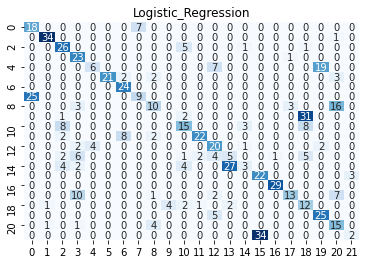

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("Logistic_Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [64]:
import pickle
with open('model_MPH_LR_newest.sav','wb') as f:
    pickle.dump(lr,f)

# SVM Linear 

In [65]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 67.58 %


<AxesSubplot:title={'center':'SVM'}>

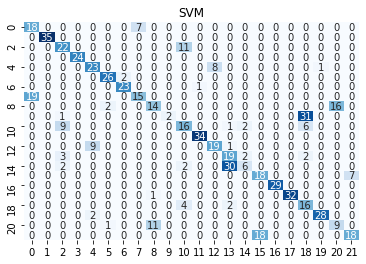

In [66]:
lr_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [67]:
import pickle
with open('model_MPH_SVM_newest.sav','wb') as f:
    pickle.dump(sv,f)

# Naive Bayes 

In [68]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)

In [69]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 77.42 %


<AxesSubplot:title={'center':'Naive Bayes'}>

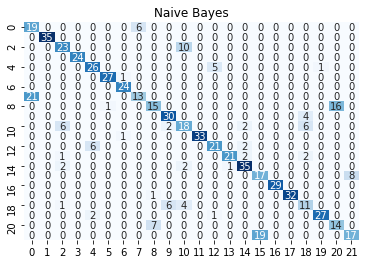

In [70]:
lr_cm=confusion_matrix(y_test,Y_pred_nb)
plt.title("Naive Bayes")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [71]:
import pickle
with open('model_MPH_NB_newest.sav','wb') as f:
    pickle.dump(nb,f)

# Decision Tree

In [72]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 76.52 %


<AxesSubplot:title={'center':'Decision Tree'}>

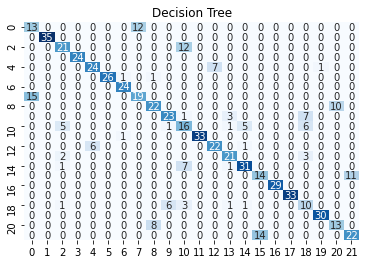

In [73]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Decision Tree")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [74]:
import pickle
with open('model_MPH_DT_newest.sav','wb') as f:
    pickle.dump(dt,f)

# Random Forest

In [75]:
rfc=RandomForestClassifier(n_estimators=10,n_jobs=2,verbose=2)
rfc.fit(x_train,y_train)
score_rf=rfc.score(x_test,y_test)
Y_pred_rf = rfc.predict(x_test)
score_rf=round(accuracy_score(Y_pred_rf,y_test)*100,2)

building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [76]:
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 78.33 %


<AxesSubplot:title={'center':'Random Forest'}>

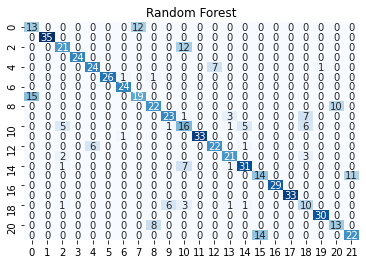

In [77]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Random Forest")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [78]:
import pickle
with open('model_MPH_RF_newest.sav','wb') as f:
    pickle.dump(rfc,f)

# ADA Boost

In [79]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada.fit(x_train, y_train)

ada.score(x_test,y_test)
predictions = ada.predict(x_test)

In [80]:
score_ada = round(accuracy_score(predictions,y_test)*100,2)

print("The accuracy score achieved using Ada Boost is: "+str(score_ada)+" %")

The accuracy score achieved using Ada Boost is: 75.61 %


<AxesSubplot:title={'center':'ADA Boost'}>

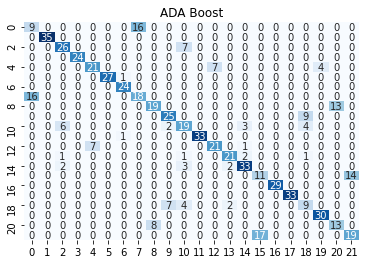

In [81]:
lr_cm=confusion_matrix(y_test,predictions)
plt.title("ADA Boost")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [82]:
import pickle
with open('model_MPH_ADA_newest.sav','wb') as f:
    pickle.dump(ada,f)

# Neural Network

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


In [84]:
import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    keras.layers.Dense(20,input_shape=x_train.shape[1:],activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(22,activation='sigmoid'),
])

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
49/49 [==============================] - 3s 2ms/step - loss: 17.8419 - accuracy: 0.0478
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 4.6352 - accuracy: 0.1033
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 2.9958 - accuracy: 0.1321
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 2.6856 - accuracy: 0.1715
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 2.6067 - accuracy: 0.2363
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 2.5651 - accuracy: 0.2788
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 2.3991 - accuracy: 0.3061
Epoch 8/100
49/49 [==============================] - 0s 2ms/step - loss: 2.2265 - accuracy: 0.3613
Epoch 9/100
49/49 [==============================] - 0s 2ms/step - loss: 2.1527 - accuracy: 0.3658
Epoch 10/100
49/49 [==============================] - 0s 2ms/step - loss: 2.0647 - accuracy: 0.3701
Epoch 11

In [87]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.7698 - accuracy: 0.6091


[0.7698168158531189, 0.6090909242630005]

In [88]:
pred=model.predict(x_test)

In [89]:
x_test

,N,P,K,ph,Moisture
627,33,57,17,6.784153,43
1994,106,46,20,6.200672,62
1665,39,21,9,6.354023,30
173,94,50,19,5.873242,28
381,11,78,22,5.940547,42
...,...,...,...,...,...
1219,4,136,204,5.898944,30
950,21,6,41,7.086948,44
872,14,59,22,6.766607,30
1176,14,18,35,4.791147,38


In [90]:
dff_new.loc[1023]

N           80.000000
P           71.000000
K           47.000000
ph           6.156373
Moisture    28.000000
label        1.000000
Name: 1023, dtype: float64

In [91]:
import math
a=np.ceil((max(pred[3])*10))

In [92]:
le.inverse_transform([int(a)])

array(['lentil'], dtype=object)

In [93]:
model.save('Neural_Networks_MPH.hp5')

INFO:tensorflow:Assets written to: Neural_Networks_MPH.hp5\assets


In [94]:
import pandas as pd
dict = {
        'Moisture':float(input("Enter Moisture:")),
        'Ph value':float(input("Enter Ph-Value:"))}
dff=pd.DataFrame(dict,index=[0])

Enter Moisture:


ValueError: could not convert string to float: ''

In [95]:
with open('model_nitrogen_moisture_ph_ada.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict(dff)
nitrogen=led[0]
print("Nitrogen is ",nitrogen)
import pickle
with open('model_Potassium_moisture_ph_ada.sav','rb') as f:
    ss=pickle.load(f)
d=ss.predict(dff)
potassium=d[0]
print("Potassium is",potassium)
with open('model_Phosphorous_moisture_ph_ada.sav','rb') as f:
    st=pickle.load(f)
ed=st.predict(dff)
phosphorous=ed[0]
print("Phosphorous is",phosphorous)

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 1 

In [96]:
with open('model_MPH_LR_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By Logidtic Regression ",le.inverse_transform([int(lr_output)]))

NameError: name 'nitrogen' is not defined

In [97]:
with open('model_MPH_NB_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By Naive Bayes ",le.inverse_transform([int(lr_output)]))

NameError: name 'nitrogen' is not defined

In [98]:
with open('model_MPH_DT_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By Decision Tree ",le.inverse_transform([int(lr_output)]))

NameError: name 'nitrogen' is not defined

In [99]:
with open('model_MPH_SVM_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By SVM ",le.inverse_transform([int(lr_output)]))

NameError: name 'nitrogen' is not defined

In [100]:
with open('model_MPH_RF_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By RF ",le.inverse_transform([int(lr_output)]))

NameError: name 'nitrogen' is not defined

In [101]:
with open('model_MPH_ADA_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By ADA ",le.inverse_transform([int(lr_output)]))

NameError: name 'nitrogen' is not defined

In [102]:
import tensorflow
filename='Neural_Networks_MPH.hp5'
loaded_model_nn = tensorflow.keras.models.load_model(filename)
rf=loaded_model_nn.predict([[int(nitrogen),int(phosphorous),int(potassium),int(list(dff.loc[0])[0]),int(list(dff.loc[0])[1])]])
print("Recommended Crop By NN ",le.inverse_transform([int(lr_output)]))

NameError: name 'nitrogen' is not defined